In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("Customer Purchasing Behaviors.csv")

In [11]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [39]:
df.isnull().sum()

age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [14]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [15]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=plt)
    plt.show()

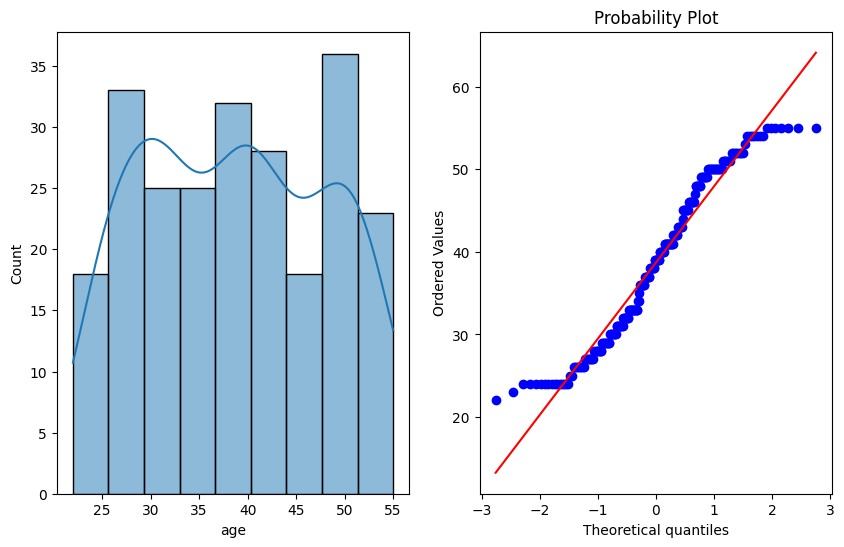

In [16]:
plot_data(df, "age")

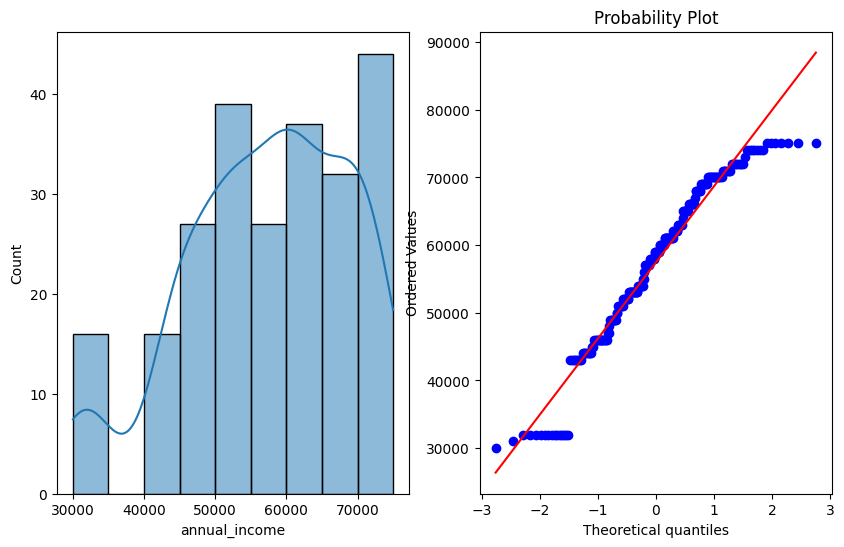

In [17]:
plot_data(df,'annual_income')

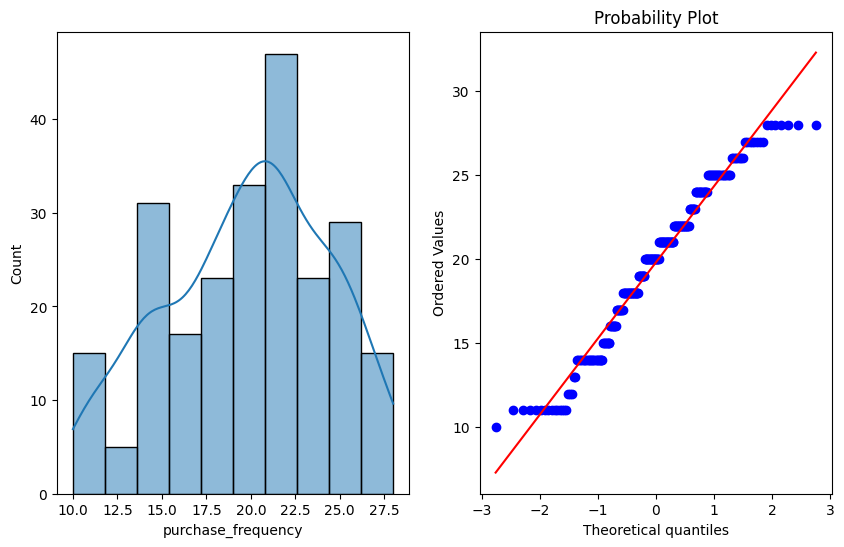

In [18]:
plot_data(df,'purchase_frequency')

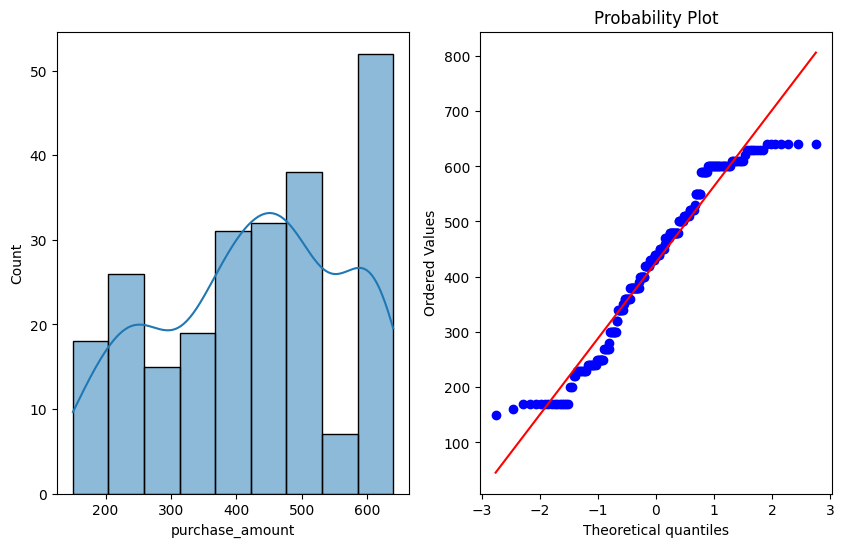

In [19]:
plot_data(df,'purchase_amount')

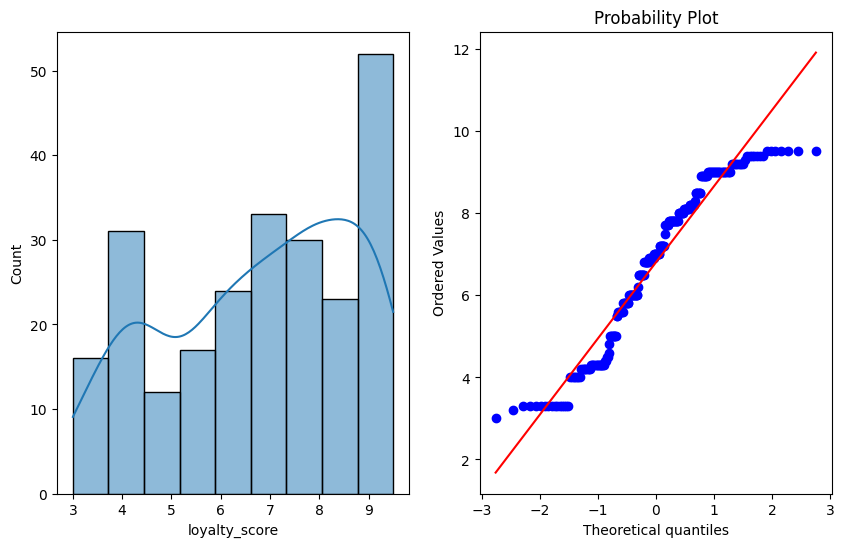

In [20]:
plot_data(df,'loyalty_score')

In [21]:
df['region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [23]:
df['region']=lbl.fit_transform(df['region'])

In [24]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,1,12
1,2,34,55000,350,7.0,2,18
2,3,45,65000,500,8.0,3,22
3,4,22,30000,150,3.0,0,10
4,5,29,47000,220,4.8,1,13


<Axes: xlabel='loyalty_score', ylabel='annual_income'>

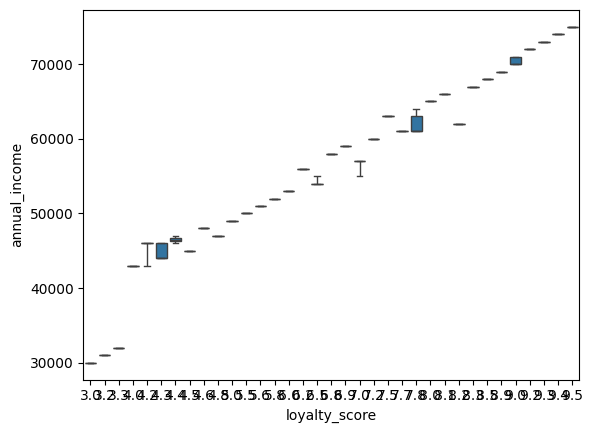

In [25]:
import seaborn as sns 
sns.boxplot(data=df,y='annual_income',x='loyalty_score', whis=(0, 100))

<Axes: >

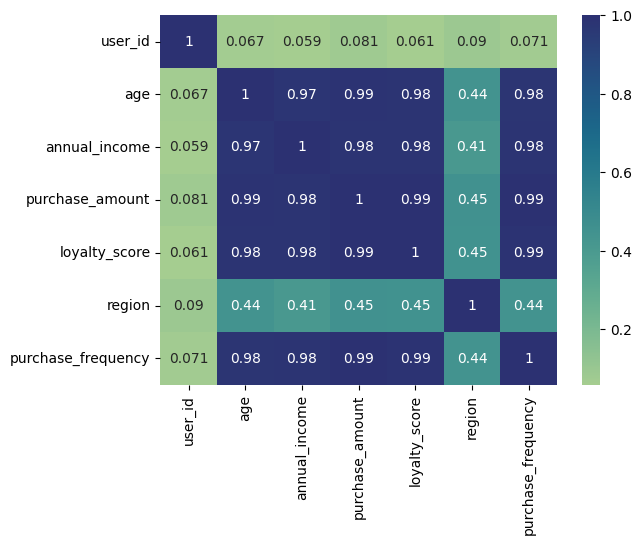

In [26]:
sns.heatmap(df.corr(),cmap="crest" ,annot=True) #didn't understand

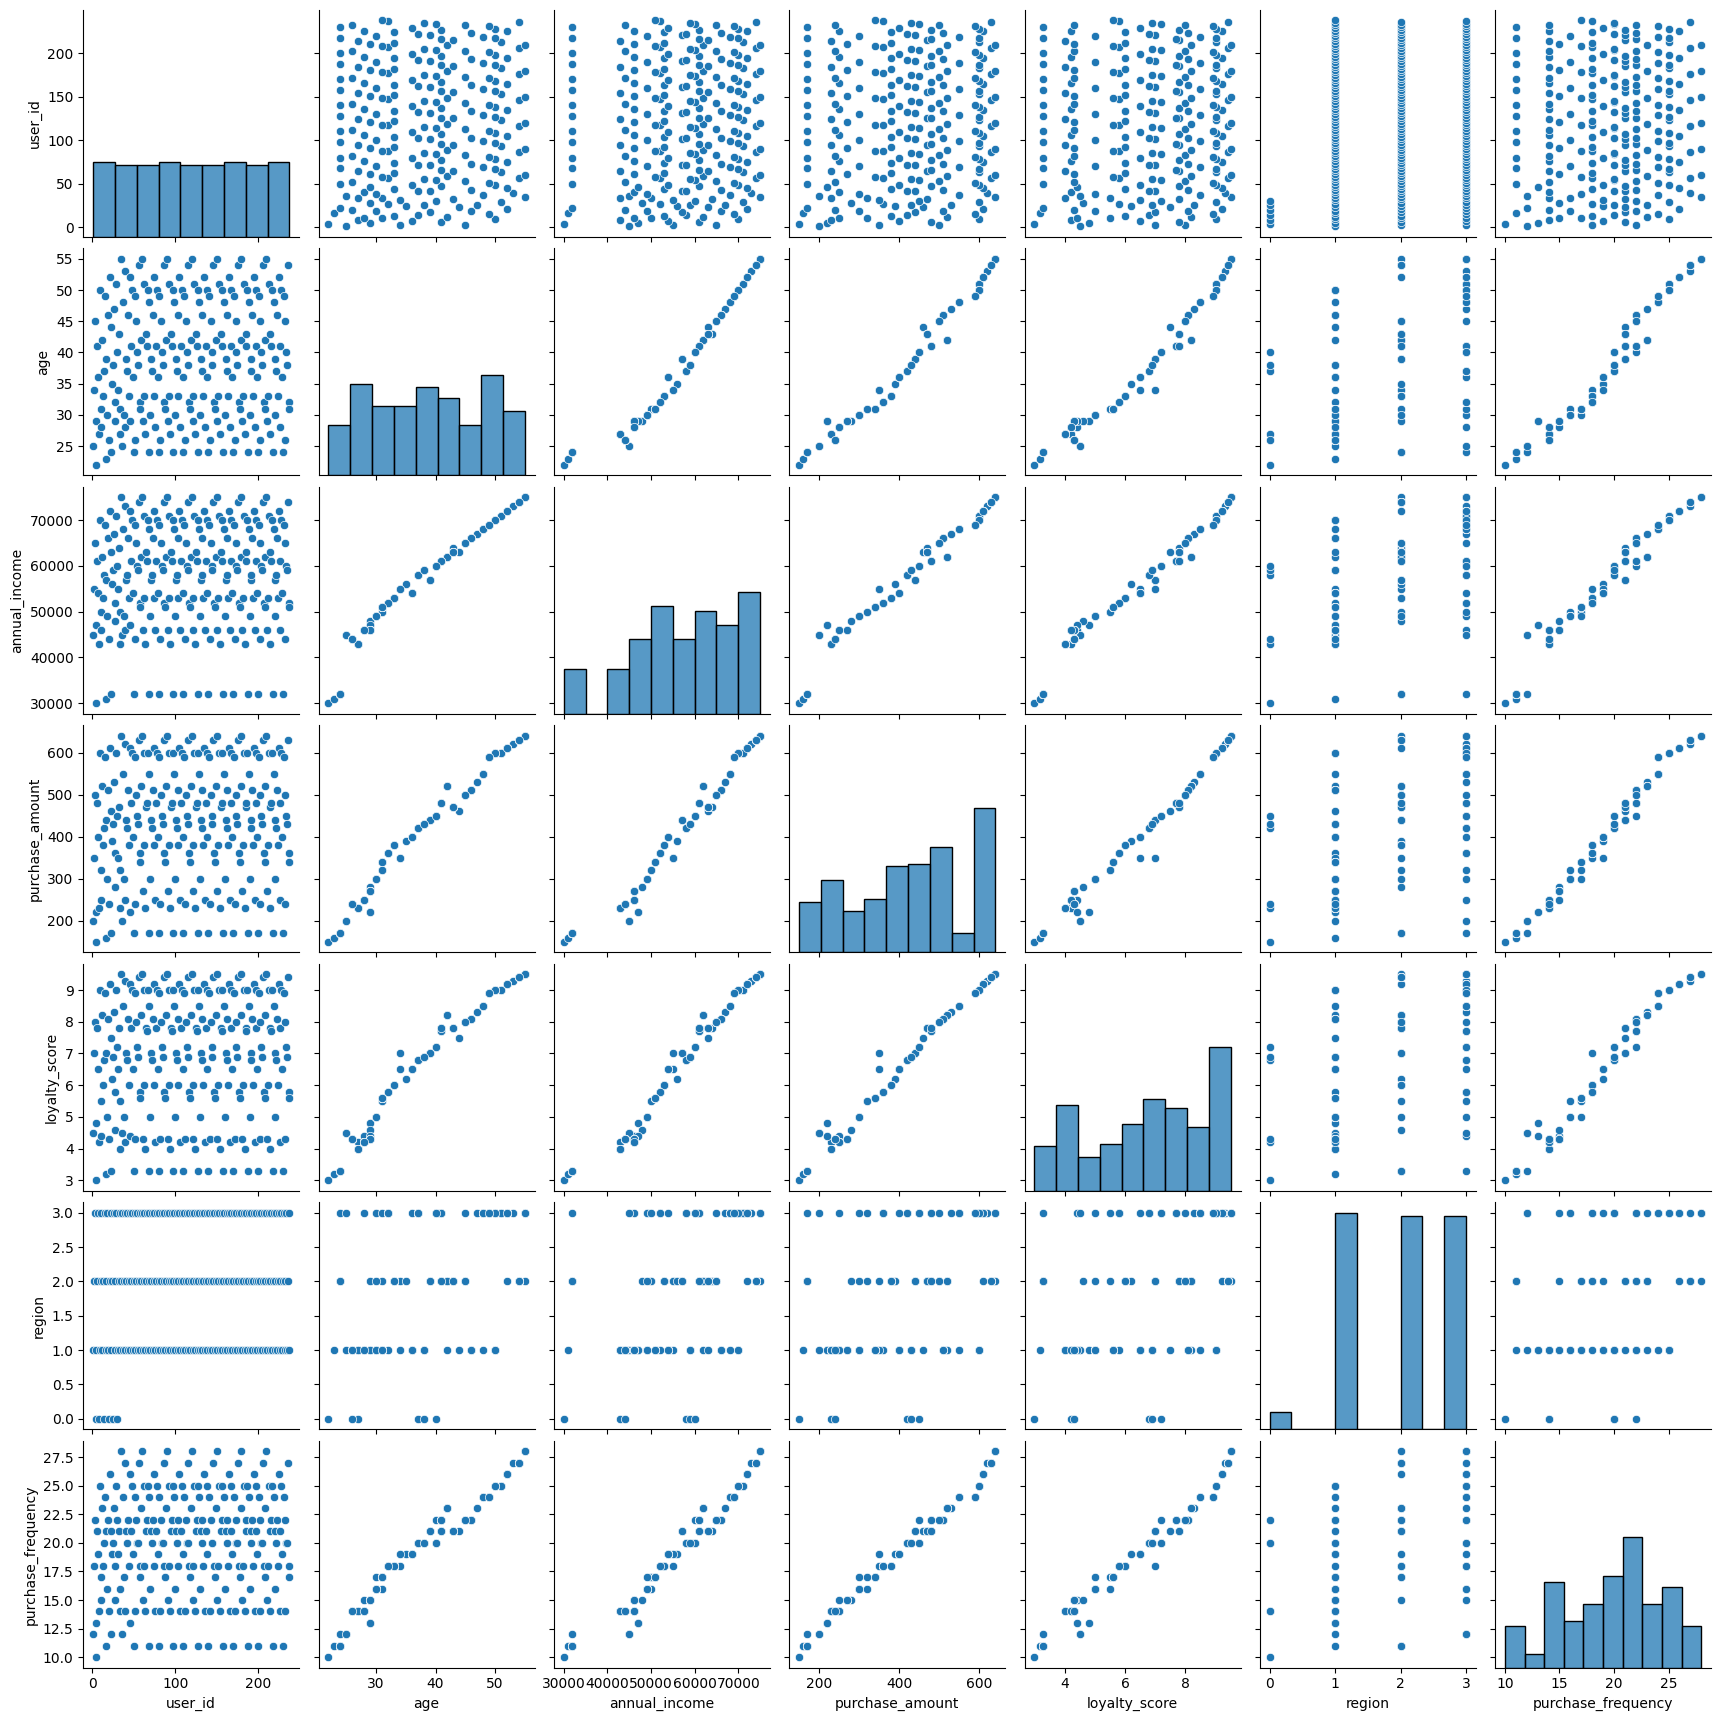

In [27]:
sns.pairplot(df) #didn't understand 

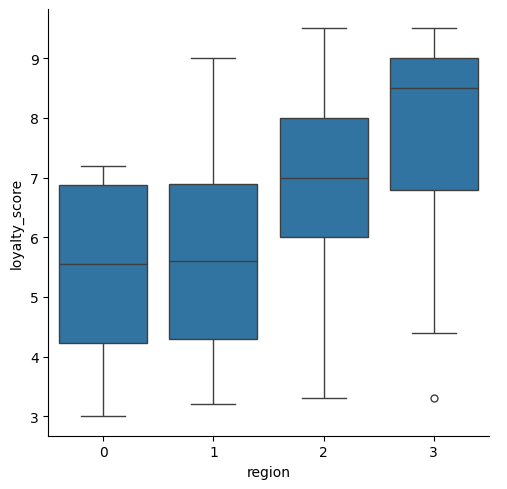

In [28]:
sns.catplot(x='region',y='loyalty_score',data=df,kind='box') #didn't understand
plt.show()

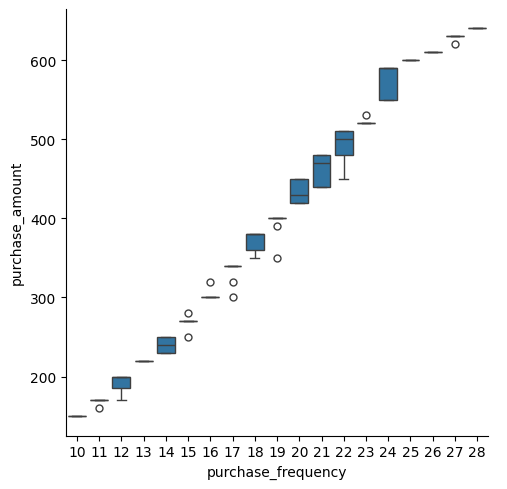

In [29]:
sns.catplot(x='purchase_frequency',y='purchase_amount',data=df,kind='box')#didn't understand
plt.show()

In [30]:
df=df.drop('user_id',axis=1)

In [31]:
df

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,1,12
1,34,55000,350,7.0,2,18
2,45,65000,500,8.0,3,22
3,22,30000,150,3.0,0,10
4,29,47000,220,4.8,1,13
...,...,...,...,...,...,...
233,40,60000,450,7.2,3,20
234,38,59000,430,6.9,1,20
235,54,74000,630,9.4,2,27
236,32,52000,360,5.8,3,18


In [32]:
from sklearn.model_selection import train_test_split

X=df.drop('purchase_amount',axis=1)
y=df['purchase_amount']

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=42) #what is random_state here?

In [34]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [35]:
X_train

,age,annual_income,loyalty_score,region,purchase_frequency
97,24,32000,3.3,2,11
147,31,51000,5.6,1,17
185,41,61000,7.7,3,22
79,24,32000,3.3,2,11
154,43,63000,7.8,2,21
...,...,...,...,...,...
106,41,61000,7.8,2,21
14,49,69000,8.9,3,24
92,51,71000,9.0,3,25
179,55,75000,9.5,3,28


In [36]:
y_pred=Lr.predict(X_test)
y_pred

array([634.87859372, 162.2464166 , 591.1777192 , 586.84805204,
       401.87539637, 571.00420836, 332.23890712, 510.78846079,
       506.63444932, 426.65593608, 235.31907899, 589.14371815,
       395.61707113, 448.84411436, 445.7941988 , 634.87859372,
       428.51428144, 429.6621145 , 358.09705124, 242.01100396,
       334.39403187, 262.06339111, 243.15883702, 634.87859372,
       265.62801397, 299.88019039, 445.7941988 , 168.69609418,
       243.95899565, 534.49148016, 483.193095  , 586.84805204,
       262.06339111, 510.78846079, 555.89883342, 262.06339111,
       519.90579837, 634.87859372, 429.6621145 , 365.51890618,
       506.63444932, 239.69101838, 448.84411436, 235.31907899,
       168.69609418, 589.14371815, 630.72458225, 168.69609418,
       483.193095  , 612.58507247, 612.58507247, 489.84274775,
       589.14371815, 429.6621145 , 555.89883342])

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

7.159824657928891
102.57582254292883
0.9953048683090371
